In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
plt.rcParams["figure.figsize"] = (15,5)
from sklearn.metrics import f1_score


In [2]:
proba_posts = pd.read_csv("datasets/notebooks_jupyter_proba_posts.csv")


In [ ]:
df_stock_init = pd.read_csv("datasets/notebooks_jupyter_stock_data_init1.csv")
df_sentiment = pd.read_csv("datasets/df_sentiment.csv")
df_stock = pd.read_csv("datasets/notebooks_jupyter_stock_data_all.csv")
df_stock_test = pd.read_csv("datasets/notebooks_jupyter_testingData_stock_pandas.csv")
df_post_test = pd.read_csv("datasets/notebooks_jupyter_testingData_post_pandas.csv")
df_post_test = df_post_test.drop("index.1", axis = 1)
labels = pd.read_csv("datasets/notebooks_jupyter_labels.csv")


In [4]:
posts_labels = pd.read_csv("datasets/posts_labels.csv")
stock_labels = pd.read_csv("datasets/stock_labels.csv")
posts_labels["prediction"] = posts_labels["prediction"].map({0: -1, 1:0.0, 2:1})
stock_labels["prediction"] = stock_labels["prediction"].map({0: -1, 1:0.0, 2:1})
ids_test = df_stock_test["id"].values
true_labels = df_stock["label"]
labels["label"] = labels["label"].map({0: -1, 1:0.0, 2:1})
true_labels = true_labels.map({0: -1, 1:0.0, 2:1})


In [5]:
def viz_posts_nr(id):
    obs = df_post_test[df_post_test["index"] == id]
    nrs = ["nr_neg","nr_pos", "nr_neutral"]
    fig = px.bar(x = nrs, y = obs[nrs].values.flatten(), color=obs[nrs].values.flatten(), height=400 , text_auto=True, 
    labels={
                        "x": "sentiment type",
                        "y": "number of posts",
                        "color": "number"
                    },
                    )
    fig.show()

def viz_posts_mean(id):
    obs = df_post_test[df_post_test["index"] == id]
    means = ["mean_neg"	,"mean_pos","mean_neutal"]
    fig = px.bar(x = means, y = obs[means].values.flatten(), color=obs[means].values.flatten(), height=400 , text_auto=True, 
    labels={
                        "x": "sentiment type",
                        "y": "mean sentimet value",
                        "color": "mean"
                    },
                    )
    fig.show()

In [6]:
def viz(nr):
    plt.plot(range(100), df_stock_test.iloc[nr, :-3], "blue", label = "present")
    
    mean_val = np.full(100, fill_value=np.mean(df_stock_test.iloc[nr, :-4]))
    plt.plot(range(100), mean_val, "--", alpha = 0.4, label = "present_mean")

    id = df_stock_test.loc[nr, "id"]
    plt.plot(range(100, 120),df_stock.iloc[id+1, 0:20] , "red", label="future")

    mean_val_new = np.full(20, fill_value=np.mean(df_stock.iloc[id+1, 0:20]))
    plt.plot(range(100, 120), mean_val_new, "--", alpha = 0.4, label = "future_mean")

    plt.annotate("", xy=(100, 0.05 * labels['label'][nr] + mean_val[0]), xytext=(99, mean_val[0]), arrowprops=dict(arrowstyle="->"))
    plt.legend() 
    start = df_stock.iloc[id, -3]
    end = df_stock.iloc[id, -2]   
    plt.xticks([0,100], [start, end])  
    plt.show()

    viz_posts_nr(id)
    viz_posts_mean(id)
    

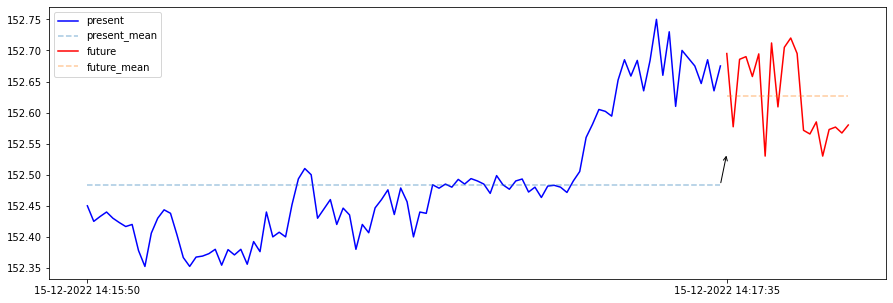

In [7]:
viz(74)

In [8]:
from sklearn.metrics import accuracy_score
y_pred = labels.label
true_labels_test = df_stock[df_stock["id"].isin(ids_test)]["label"]

true_labels_test = true_labels_test.map({0: -1, 1:0.0, 2:1})
y_true = true_labels_test
print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average='weighted'))



0.5137614678899083
0.46941930362034745


tweets and stock

In [9]:
def viz2(nr):
    
    plt.plot(range(100), df_stock_test.iloc[nr, :-3], "blue", label = "present")
    
    mean_val = np.full(100, fill_value=np.mean(df_stock_test.iloc[nr, :-4]))
    plt.plot(range(100), mean_val, "--", alpha = 0.4, label = "present_mean")

    id = df_stock_test.loc[nr, "id"]
    plt.plot(range(100, 120),df_stock.iloc[id+1, 0:20] , "red", label="future")
    start = df_stock.iloc[id, -3]
    end = df_stock.iloc[id, -2]

    mean_val_new = np.full(20, fill_value=np.mean(df_stock.iloc[id+1, 0:20]))
    plt.plot(range(100, 120), mean_val_new, "--", alpha = 0.4, label = "future_mean")
    
    plt.annotate("post", xy=(103, 0.05 * posts_labels['prediction'][nr] + mean_val[0]), xytext=(100, mean_val[0]),  arrowprops=dict(arrowstyle="->"))
    
    plt.annotate("stock", xy=(98, 0.05 * stock_labels['prediction'][nr] + mean_val[0]), xytext=(95, mean_val[0]), arrowprops=dict(arrowstyle="->"))

    plt.xticks([0,100], [start, end])  

    plt.legend()    

    plt.show()

    viz_posts_nr(id)
    viz_posts_mean(id)
    

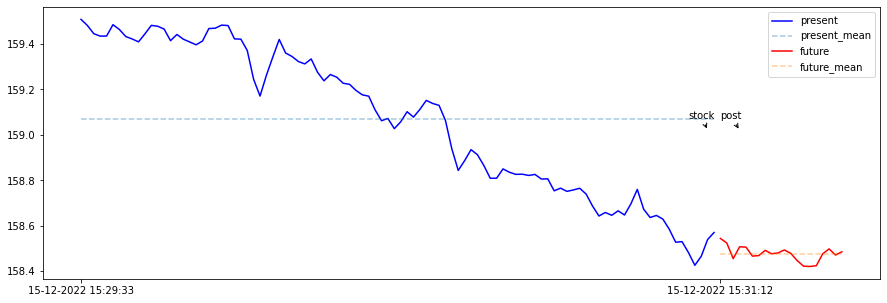

In [10]:
viz2(87)